In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from joblib import dump,load
import plotly.express as px

In [43]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/house_pricing.csv")
pd.set_option('display.max_columns',None)
df.shape
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [44]:
X=df[['Beds','Baths','SquareFeet']]
y=df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.4,random_state=1)

In [45]:
px.scatter_3d(df,x='Beds',y='SquareFeet',z='Price')

In [51]:
print('Random_forest')
model=DecisionTreeRegressor(max_depth=15)
model.fit(xtest,ytest)
print("Score:",model.score(xtest,ytest)*100)
pred=model.predict(X)
print("mse",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

Random_forest
Score: 99.69816687620873
mse 2800818614.2058015
mae: 21712.343345523845


<AxesSubplot:ylabel='Density'>

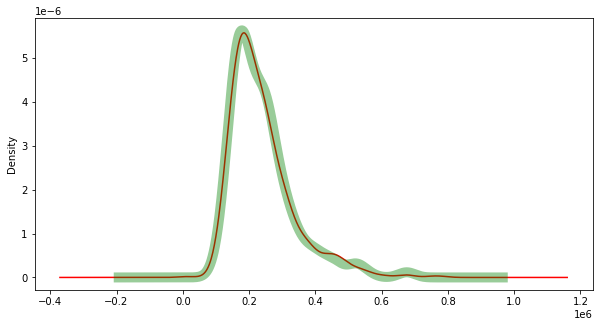

In [52]:
df['p1']=pred
ax=df['Price'].plot(kind='kde',color='red',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,color='green',alpha=.4,linewidth=10)

<AxesSubplot:ylabel='Density'>

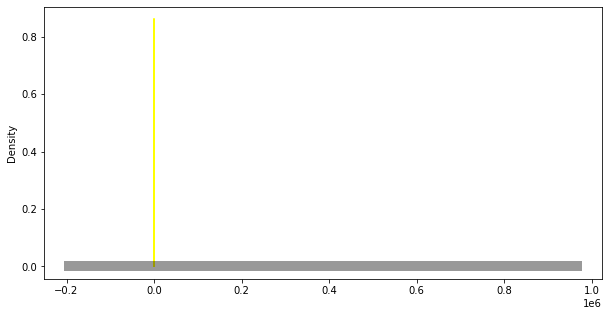

In [53]:
df['p2']=pred
ax=df['Beds'].plot(kind='kde',color='yellow',figsize=(10,5))
df['p2'].plot(kind='kde',ax=ax,color='black',alpha=.4,linewidth=10)